In [1]:
"""
Purpose: 
Introduction to the following topics
1) Importing Meshes
2) Object Visualization
3) Neuron Decomposition
- meshparty
- meshafterparty
4) Neuron Visualizations
5) Exporting Decomposition of Neurons
6) Importing Decomposition
7) Exploring the different parts of the decomposition
"""

'\nPurpose: \nIntroduction to the following topics\n1) Importing Meshes\n2) Object Visualization\n3) Neuron Decomposition\n- meshparty\n- meshafterparty\n4) Neuron Visualizations\n5) Exporting Decomposition of Neurons\n6) Importing Decomposition\n7) Exploring the different parts of the decomposition\n'

# Importing Relevant Packages

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")

In [3]:
import soma_extraction_utils as sm
import neuron
import neuron_visualizations as nviz
from pathlib import Path

# Importing Neuron Mesh

In [4]:
neuron_mesh_file = Path("../test_neurons/spine_detection/100224677766544793_inhibitory_2.off")
seg_id = 100224677766544793
description="inhibitory_2"

neuron_mesh_file = Path("../test_neurons/spine_detection/90725377802114822_inhibitory_7.off")
seg_id = 90725377802114822
description="inhibitory_7"

import trimesh_utils as tu
current_neuron_mesh = tu.load_mesh_no_processing(neuron_mesh_file)

# Object Visualization

In [5]:
nviz.plot_objects(meshes=current_neuron_mesh)

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


# Decomposition of Mesh (meshparty)

In [6]:
current_neuron_mp = neuron.Neuron(
                 mesh=current_neuron_mesh, 
                 segment_id=seg_id,
                 description=description,
                 decomposition_type="meshparty",
                suppress_output=True)

Processing Neuorn in minimal output mode...please wait
Total time for neuron instance creation = 53.625767946243286


# Visualizing the Neuron Decomposition

In [7]:
nviz.visualize_neuron(current_neuron_mp,
                     visualize_type = ["mesh","skeleton"],
                     limb_branch_dict="all",
                     )


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [8]:
nviz.visualize_neuron(current_neuron_mp,
                     visualize_type = ["mesh","network"],
                     limb_branch_dict="all",
                      node_size=1
                     )


 Working on visualization type: mesh

 Working on visualization type: network


In [9]:
nviz.plot_spines(current_neuron_mp)


 Working on visualization type: mesh


# Basic Data Types Used Behind the Scenes

# a) Mesh: Array of vertices (N,3) and Array of Faces (N,3)m

In [30]:
current_neuron_mp.mesh.vertices

TrackedArray([[ 720896. , 1009952. ,  768340. ],
              [ 834201.6,  964469.6,  748369.8],
              [ 829542.4,  962897.2,  748957.8],
              ...,
              [ 849135.5,  961043.4,  740862.9],
              [ 726511.5, 1001858. ,  766389.4],
              [ 748066.7,  984243.3,  761696.7]])

# b) Skeleton: Array of coordinate aligned as edges (N,2,3)

In [31]:
current_neuron_mp.skeleton

array([[[792893.95413775, 947435.86083107, 743256.27882041],
        [792888.7748417 , 947421.9807538 , 743237.73203048]],

       [[792888.7748417 , 947421.9807538 , 743237.73203048],
        [792872.47448313, 947381.4281819 , 743185.26283532]],

       [[792872.47448313, 947381.4281819 , 743185.26283532],
        [792842.95726713, 947317.34379189, 743107.29553324]],

       ...,

       [[798849.82969044, 946969.41174598, 747754.56766961],
        [805101.88111377, 952154.26710178, 750169.18723955]],

       [[798849.82969044, 946969.41174598, 747754.56766961],
        [799561.5779939 , 952126.42949793, 742074.95119348]],

       [[798849.82969044, 946969.41174598, 747754.56766961],
        [804951.47024706, 943021.88189138, 745297.78357069]]])

# c) Connectivity: Networkx Graph Objects

In [32]:
import networkx as nx

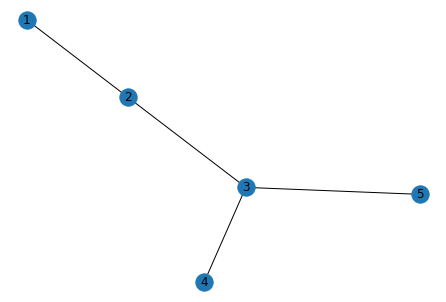

In [33]:
G = nx.from_edgelist([[1,2],[2,3],[3,4],[3,5]])
nx.draw(G,with_labels=True)

In [34]:
G.nodes()

NodeView((1, 2, 3, 4, 5))

In [35]:
G.edges()

EdgeView([(1, 2), (2, 3), (3, 4), (3, 5)])

# Visualizing Limb and Soma

In [10]:
current_neuron_mp.concept_network

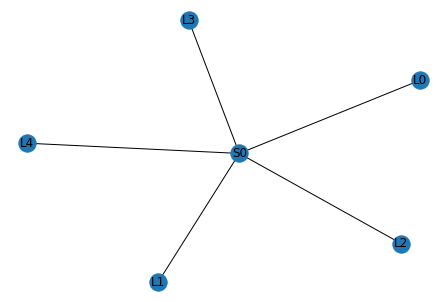

In [11]:
# Usual Way of visualizing networkx graph
import networkx as nx
import matplotlib.pyplot as plt
nx.draw(current_neuron_mp.concept_network,with_labels=True)
plt.show()

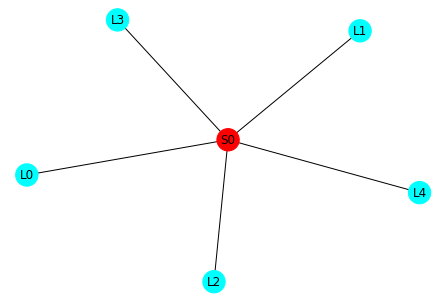

In [12]:
# Improved way of visualizing neuron networkx graph
nviz.plot_soma_limb_concept_network(current_neuron_mp)

# ---- Knowing which limbs are which (becuase we can't put floating labels)--- 

In [13]:
returned_colors = nviz.visualize_neuron(current_neuron_mp,
                                       visualize_type=["mesh"],
                                        limb_branch_dict="all",
                                        mesh_resolution="limb",
                                        mesh_color_alpha=1,
                                        return_color_dict=True
                                       )


 Working on visualization type: mesh


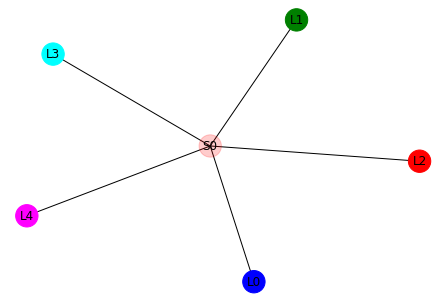

In [14]:
nviz.plot_soma_limb_concept_network(current_neuron_mp,
                                   node_colors=returned_colors)

In [15]:
#old way of accessing nodes with networkx
soma_obj = current_neuron_mp.concept_network.nodes["S0"]["data"]
limb_obj = current_neuron_mp.concept_network.nodes["L1"]["data"]
nviz.plot_objects(meshes=[limb_obj.mesh,soma_obj.mesh],
                 skeletons=[limb_obj.skeleton])

In [16]:
# better way with neuron object of accessing objects
soma_obj = current_neuron_mp["S0"]
limb_obj = current_neuron_mp["L1"]
limb_obj = current_neuron_mp[1]
nviz.plot_objects(meshes=[limb_obj.mesh,soma_obj.mesh],
                 skeletons=[limb_obj.skeleton])

In [17]:
# non-manual plotting
nviz.visualize_neuron(current_neuron_mp,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(L1="all"),
                     mesh_resolution="limb",
                     skeleton_resolution="limb",
                     mesh_soma=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


# The Soma Object

In [18]:
soma_obj = current_neuron_mp["S0"]
print(f"soma_obj.mesh_center={soma_obj.mesh_center}")
print(f"soma_obj.sdf={soma_obj.sdf}")
nviz.plot_objects(meshes=soma_obj.mesh)

soma_obj.mesh_center=[798849.82969044 946969.41174598 747754.56766961]
soma_obj.sdf=0.8903285


# Limb Object

In [19]:
limb_obj = current_neuron_mp[1]
#dir(limb_obj)
interesting_attributes = ["touching_somas",
                         "all_concept_network_data",
                         "mesh_center",
                         "mesh",
                          "spines",
                         "skeleton",
                         "set_concept_network_directional"]

print(f"touching_somas = {limb_obj.touching_somas()}")
print(f"mesh_center = {limb_obj.mesh_center}")
limb_obj.all_concept_network_data


touching_somas = [0]
mesh_center = [763114.57512831 969391.88347809 746046.29681537]


[{'starting_soma': 0,
  'starting_node': 4,
  'starting_endpoints': array([[792796.02918627, 949055.64790617, 753873.16858682],
         [793975.1542206 , 949290.23933934, 756557.92787511]]),
  'starting_coordinate': array([792796.02918627, 949055.64790617, 753873.16858682]),
  'touching_soma_vertices': TrackedArray([[793274.6, 946265. , 753011.8],
                [795034.8, 944907.8, 753559.8],
                [795105.4, 944939.6, 753724.8],
                [793338.6, 946120.4, 753085.8],
                [796196.8, 944680.1, 754098.4],
                [795433.4, 944764.3, 753796.4],
                [795890.8, 944880.8, 754293.6],
                [793239.8, 946439.6, 753121.3],
                [794458.4, 945158.5, 753480.4],
                [793226.2, 946700.9, 753027.9],
                [793497. , 945926. , 752998.4],
                [793813.4, 945466.8, 753140.8],
                [796439.4, 944857.4, 754465.8],
                [796734.2, 945227.2, 754878.5],
                [796664.8

In [20]:
limb_obj.spines

[<trimesh.Trimesh(vertices.shape=(22, 3), faces.shape=(38, 3))>,
 <trimesh.Trimesh(vertices.shape=(21, 3), faces.shape=(37, 3))>,
 <trimesh.Trimesh(vertices.shape=(18, 3), faces.shape=(31, 3))>,
 <trimesh.Trimesh(vertices.shape=(16, 3), faces.shape=(25, 3))>,
 <trimesh.Trimesh(vertices.shape=(15, 3), faces.shape=(24, 3))>,
 <trimesh.Trimesh(vertices.shape=(14, 3), faces.shape=(23, 3))>]

In [22]:
# limb object as mesh,spines,skeleton
nviz.plot_objects(main_mesh=limb_obj.mesh,
                 meshes=limb_obj.spines,
                 meshes_colors="black",
                 skeletons=limb_obj.skeleton)

# Accessing and Visualizing the Branches

In [23]:
#showing that the limb object has 
limb_obj.concept_network.nodes()

NodeView((1, 4, 0, 2, 3, 5))

In [24]:
# easy plotting of concept network
returned_colors = nviz.visualize_neuron(current_neuron_mp,
                     visualize_type=["network","mesh"],
                     limb_branch_dict=dict(L1="all"),
                     node_size=2,
                      return_color_dict=True
                     )


 Working on visualization type: network

 Working on visualization type: mesh


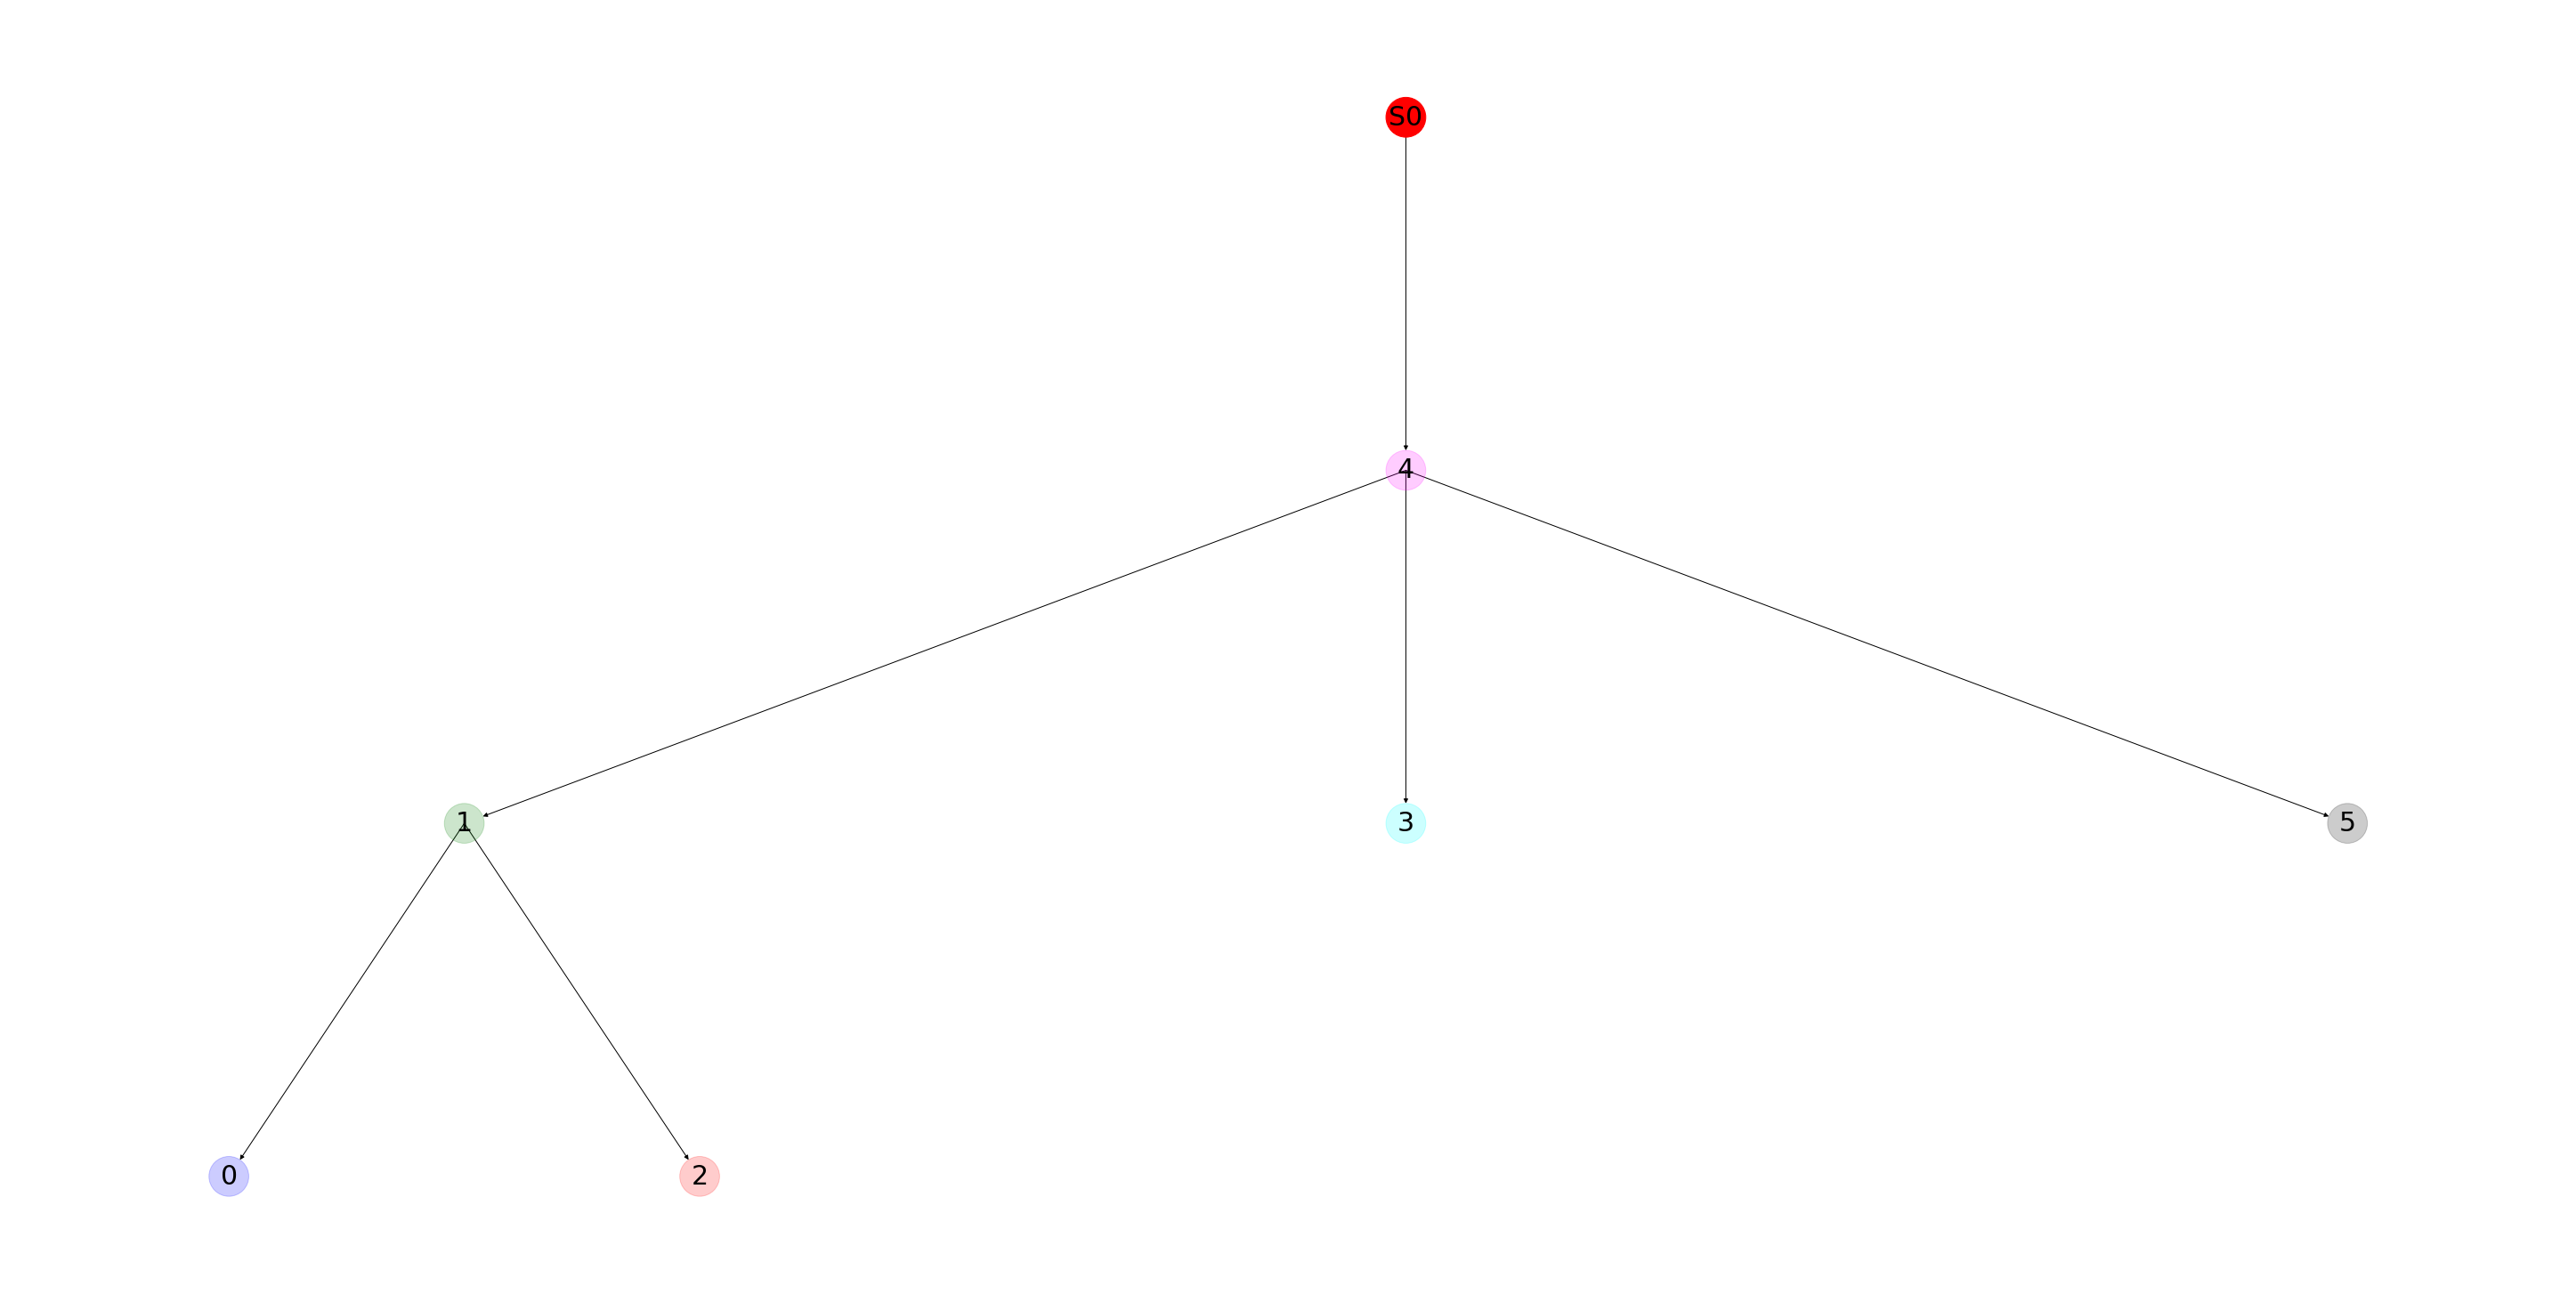

In [26]:
nviz.plot_limb_concept_network_2D(current_neuron_mp,
                                 limb_name="L1",
                                  font_color="black",
                                 node_colors=returned_colors)

# Branch Object

In [27]:
# full way to access branch
curr_limb = current_neuron_mp.concept_network.nodes["L1"]["data"]
curr_branch = curr_limb.concept_network.nodes[3]["data"]
curr_branch

In [36]:
# faster way to access branch
curr_branch = current_neuron_mp[1][3]
dir(curr_branch)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'endpoints',
 'labels',
 'mesh',
 'mesh_center',
 'mesh_face_idx',
 'skeleton',
 'spines',
 'width',
 'width_array',
 'width_new']

In [47]:
# basic properties of the branch object
print(f"endpoints = {curr_branch.endpoints}")
print(f"mesh_center = {curr_branch.mesh_center}")
print(f"width = {curr_branch.width}")
print(f"labels = {curr_branch.labels}")

endpoints = [[791420.82435272 963024.82847196 779391.095879  ]
 [793975.1542206  949290.23933934 756557.92787511]]
mesh_center = [793012.51029787 954142.91665248 767785.4649078 ]
width = 1164.4095926531859
labels = []


In [48]:
# other width definitions
curr_branch.width_new

{'median_mesh_center': 572.5340552711525,
 'no_spine_median_mesh_center': 572.5340552711525,
 'no_spine_mean_mesh_center': 561.6528538326565}

In [46]:
#width as you traverse along the skeleton (in segments specified on calculation, currently set to 1000 nm steps)
curr_branch.width_array

{'median_mesh_center': array([633.88652678, 569.6765382 , 502.47351652, 466.24931743,
        495.99806877, 482.86948511, 685.56510053, 610.49473273,
        567.65538453, 547.7300367 , 538.40616968, 518.75220407,
        507.91824737, 558.47755106, 591.59407964, 625.84164744,
        617.43429177, 566.31312372, 588.57262519, 600.09591144,
        575.39157234, 535.91897997, 603.15462096, 638.21352773,
        632.57958486, 612.37022456, 600.54139024, 248.31516955]),
 'no_spine_median_mesh_center': array([633.88652678, 569.6765382 , 502.47351652, 466.24931743,
        495.99806877, 486.65976354, 685.56510053, 610.49473273,
        567.65538453, 547.7300367 , 538.40616968, 518.75220407,
        507.91824737, 558.47755106, 591.59407964, 625.84164744,
        617.43429177, 566.31312372, 588.57262519, 600.09591144,
        575.39157234, 535.91897997, 603.15462096, 638.21352773,
        632.57958486, 612.37022456, 600.54139024, 248.31516955]),
 'no_spine_mean_mesh_center': array([633.886526

In [49]:
nviz.plot_objects(meshes=curr_branch.spines)

In [38]:
nviz.plot_objects(main_mesh=curr_branch.mesh,
          meshes=curr_branch.spines,
          meshes_colors="black",
          skeletons=curr_branch.skeleton
         )

In [41]:
nviz.visualize_neuron(current_neuron_mp,
                      visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(L1=[3]))


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Exporting Neuron Decompositions

In [56]:
current_neuron_mp.save_compressed_neuron(
    output_folder="./",
    export_mesh=False,

)

Saving Neuorn in suppress_output mode...please wait
Saved File at location: 90725377802114822_inhibitory_7


In [59]:
import neuron_utils as nru
reloaded_neuron = nru.decompress_neuron(filepath="./90725377802114822_inhibitory_7",
                     original_mesh=neuron_mesh_file,
                     )

Decompressing Neuron in minimal output mode...please wait


In [60]:
nviz.visualize_neuron(reloaded_neuron,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


# MeshAfterParty (Higher Fidelity Decomposition)

In [ ]:
"""
Only difference in how you would do decomposition:

current_neuron_map = neuron.Neuron(
                 mesh=current_neuron_mesh, 
                 segment_id=seg_id,
                 description=description,
                 decomposition_type="meshafterparty",  ******** this is the only line that is different *********
                suppress_output=True)


"""

In [70]:
#Loading a precomputed meshafterparty decomposition
import neuron_utils as nru
curr_neuron_map = nru.decompress_neuron(filepath=f"../test_neurons/spine_detection/inhibitory_meshafterparty/{seg_id}_{description}_meshafterparty",
                     original_mesh=neuron_mesh_file,
                     )

Decompressing Neuron in minimal output mode...please wait


In [71]:
nviz.visualize_neuron(curr_neuron_map,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [72]:
nviz.plot_spines(curr_neuron_map)


 Working on visualization type: mesh


# Exploring Other Meshes that were already decomposed 

# -- Example 1 -- 

In [75]:
excitatory_file = "97626050552733538_excitatory_9"

exc_1 = nru.decompress_neuron(filepath=f"../test_neurons/spine_detection/excitatory_meshafterparty/{excitatory_file}_meshafterparty",
                     original_mesh=f"../test_neurons/spine_detection/{excitatory_file}",
                     )

Decompressing Neuron in minimal output mode...please wait


In [78]:
nviz.visualize_neuron(exc_1,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [79]:
nviz.plot_spines(exc_1)


 Working on visualization type: mesh


# -- Example 2 (Ex of Merge Error)-- 

In [80]:
excitatory_file = "100917645171610430_excitatory_8"

exc_2 = nru.decompress_neuron(filepath=f"../test_neurons/spine_detection/excitatory_meshafterparty/{excitatory_file}_meshafterparty",
                     original_mesh=f"../test_neurons/spine_detection/{excitatory_file}",
                     )

Decompressing Neuron in minimal output mode...please wait


In [81]:
nviz.visualize_neuron(exc_2,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [82]:
nviz.plot_spines(exc_2)


 Working on visualization type: mesh
